In [44]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

### Reto 1
Utiliza el Iris dataset, que contiene información sobre la longitud y ancho de sépalos y pétalos de flores Iris.

Aunque este conjunto de datos típicamente se usa para tareas de clasificación, tu tarea será realizar un clustering y luego comparar los clusters obtenidos con las etiquetas reales para ver qué tan bien el algoritmo ha logrado agrupar las flores similares.

- Importa el Iris dataset con scikit-learn.


In [9]:
iris = datasets.load_iris(as_frame = True)
x = iris.data

- Utiliza el algoritmo KMeans de scikit-learn para realizar el clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 
- Asumiendo que desconoces el número real de clases, puedes elegir k=3 para el número de clusters, ya que este es el número real de clases en el dataset.


In [10]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(x)
kmeans.labels_

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

- Para cada cluster, calcula descriptores estadísticos como la media, mediana, desviación estándar, etc., para cada característica (longitud y ancho de sépalos y pétalos).


In [11]:
#Añadimos kmeans labels
xk = x.copy()
xk['kmeans_labels'] = kmeans.labels_


In [92]:
xk.groupby('kmeans_labels').describe()

sepal length (cm)                                                \
                          count      mean       std  min   25%  50%  75%  max   
kmeans_labels                                                                   
0                          61.0  5.883607  0.448025  4.9  5.60  5.9  6.2  6.8   
1                          50.0  5.006000  0.352490  4.3  4.80  5.0  5.2  5.8   
2                          39.0  6.853846  0.488201  6.1  6.45  6.7  7.2  7.9   

              sepal width (cm)            ... petal length (cm)       \
                         count      mean  ...               75%  max   
kmeans_labels                             ...                          
0                         61.0  2.740984  ...             4.800  5.1   
1                         50.0  3.428000  ...             1.575  1.9   
2                         39.0  3.076923  ...             6.000  6.9   

              petal width (cm)                                               
                         count      mean       std  min  25%  50%  75%  max  
kmeans_labels                                                                
0                         61.0  1.434426  0.299936  1.0  1.3  1.4  1.6  2.4  
1                         50.0  0.246000  0.105386  0.1  0.2  0.2  0.3  0.6  
2                         39.0  2.053846  0.296334  1.4  1.8  2.1  2.3  2.5  

[3 rows x 32 columns]

In [12]:
#Dividimos en tres dataframes
x0 = xk[xk['kmeans_labels'] == 0]
x1 = xk[xk['kmeans_labels'] == 1]
x2 = xk[xk['kmeans_labels'] == 2]

#Dibujamos histogramas
#x0.hist()
#x1.hist()
#x2.hist()
x0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_labels
51,6.4,3.2,4.5,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
55,5.7,2.8,4.5,1.3,0
56,6.3,3.3,4.7,1.6,0
...,...,...,...,...,...
133,6.3,2.8,5.1,1.5,0
138,6.0,3.0,4.8,1.8,0
142,5.8,2.7,5.1,1.9,0
146,6.3,2.5,5.0,1.9,0


In [13]:
#Predicciones

y = kmeans.predict(x)
y0 = kmeans.predict(x0.iloc[:,:4])
y1 = kmeans.predict(x1.iloc[:,:4])
y2 = kmeans.predict(x2.iloc[:,:4])

col = list(x1.iloc[:,:4].columns)

In [14]:
#Descriptores estadisticos

v = [x0, x1, x2]

 
def crear_dt_media():    
    dfs = []
    medias = pd.DataFrame()
    for i in v:
        data = []
        for j in col:
            data.append(np.mean(np.array(i[j])))
        df = pd.DataFrame(data, index=col, columns=['Media'])
        dfs.append(df)
    medias = pd.concat(dfs, axis=1, keys=['x0', 'x1', 'x2'])
    return medias
def crear_dt_mediana():       
    dfs = []
    mediana = pd.DataFrame()
    for i in v:
        data = []
        for j in col:
            data.append(np.median(np.array(i[j])))
        df = pd.DataFrame(data, index=col, columns=['Mediana'])
        dfs.append(df)
    mediana = pd.concat(dfs, axis=1, keys=['x0', 'x1', 'x2'])
    return mediana
def crear_dt_desv():
    dfs = []
    desviacion = pd.DataFrame()
    for i in v:
        data = []
        for j in col:
            data.append(np.std(np.array(i[j])))
        df = pd.DataFrame(data, index=col, columns=['Desviacion'])
        dfs.append(df)
    desviacion = pd.concat(dfs, axis=1, keys=['x0', 'x1', 'x2'])
    return desviacion

crear_dt_media()

,x0,x1,x2
,Media,Media,Media
sepal length (cm),5.883607,5.006,6.853846
sepal width (cm),2.740984,3.428,3.076923
petal length (cm),4.388525,1.462,5.715385
petal width (cm),1.434426,0.246,2.053846


In [15]:
crear_dt_mediana()

,x0,x1,x2
,Mediana,Mediana,Mediana
sepal length (cm),5.9,5.0,6.7
sepal width (cm),2.8,3.4,3.0
petal length (cm),4.5,1.5,5.6
petal width (cm),1.4,0.2,2.1


In [16]:
crear_dt_desv()

,x0,x1,x2
,Desviacion,Desviacion,Desviacion
sepal length (cm),0.444338,0.348947,0.481901
sepal width (cm),0.290493,0.375255,0.283261
petal length (cm),0.507355,0.171919,0.503597
petal width (cm),0.297468,0.104326,0.292510



- Crea una tabla de contingencia (https://es.wikipedia.org/wiki/Tabla_de_contingencia, puedes utiliza `pd.crosstab`) entre las etiquetas reales y las etiquetas de cluster. Esto te dará una idea de qué tan bien el algoritmo de clustering ha coincidido con las etiquetas reales.


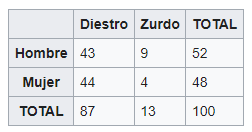

In [17]:
t_contigencia = pd.crosstab(xk['kmeans_labels'], iris['target'])

print(t_contigencia)

target          0   1   2
kmeans_labels            
0               0  47  14
1              50   0   0
2               0   3  36



- ¿Que cluster se corresponde con cada etiqueta? Ten en cuenta que los numeros pueden no coincidir. ¿A que se debe esto?


A los errores del modelo


- Utiliza técnicas de reducción de dimensionalidad, como PCA, para visualizar los clusters en 2D. Haz dos scatterplot con las dos coordenadas del PCA, y en uno utiliza el cluster al que pertenece cada instancia para colorearlo. En el otro utiliza la etiqueta real.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)


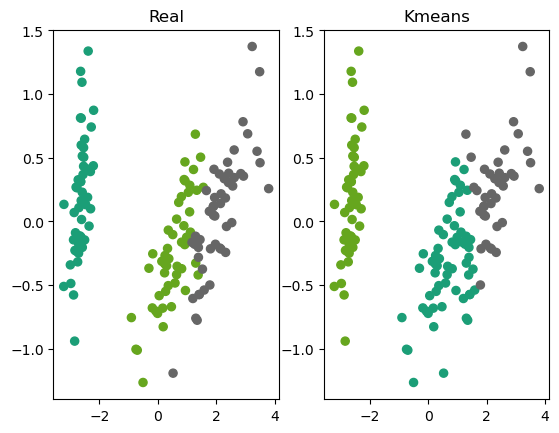

In [39]:
plt.subplot(121)
plt.title('Real')
plt.scatter(x_pca[:, 0],
            x_pca[:, 1],
            c=iris['target'],
            cmap='Dark2',
            s=34)

plt.subplot(122)
plt.title('Kmeans')
plt.scatter(x_pca[:, 0],
            x_pca[:, 1],
            c=xk['kmeans_labels'],
            cmap='Dark2',
            s=34)


### Reto 2

En este ejercicio, vamos a utilizar un conjunto de datos de alta dimensión y lo reduciremo usando el Análisis de Componentes Principales (PCA) para conservar el **90%** de la varianza explicada. Luego, entrenaremos un modelo usando ambos: el conjunto de datos original y el conjunto de datos reducido para luego comparar el rendimiento de los modelos.

- Utiliza el conjunto de datos "digits" de scikit-learn, que contiene imágenes de dígitos escritos a mano y es de alta dimensión. ¿Cuantas instancias y features tiene?
- Escala tus datos para que tengan media 0 y varianza 1. Utiliza el StandardScaler.
- Utiliza PCA para reducir la dimensionalidad, probando desde una unica dimension hasta N-1, donde N es el numero de fatures. Realiza un grafico en el que en el eje X se muestre el numero de dimensione sy en el eje Y se muestre el porcentaje de varianza explicada. Utiliza este grafico para elegir un valor que conserve el 90% y obten las features proyectadas.
- Divide entre train y test
- Escoge un modelo y crea dos isntancias del mismo. Entrena uno con el dataset entero y el otro con el dataset con las variables proyectadas. 
- Evalúa los modelos. ¿Hay alguna diferencia entre ellos?
- ¿Con cuantas features menos se ha entrnado del modelo en el que se utilizan los datos reducidos?

In [48]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [46]:
data = load_digits()
x = data['data']
y = data['target']

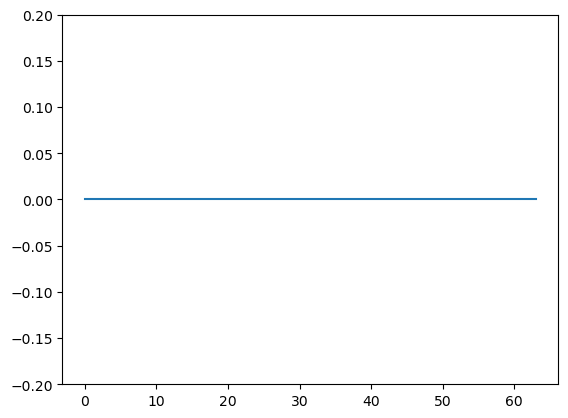

In [49]:
scaler = StandardScaler()
scaler.fit(x)
    
x_scaled = scaler.transform(x)
    
plt.ylim(-0.2,0.2)
plt.plot(x_scaled.mean(axis=0))

In [53]:
pca = PCA(n_components = x.shape[1])
pca.fit(x_scaled)

PCA(n_components=64)

In [62]:
ve = [sum(pca.explained_variance_ratio_[:i]) for i in range(x.shape[1])]

Text(0.5, 1.0, 'Varianza explicada por nº features incluidas')

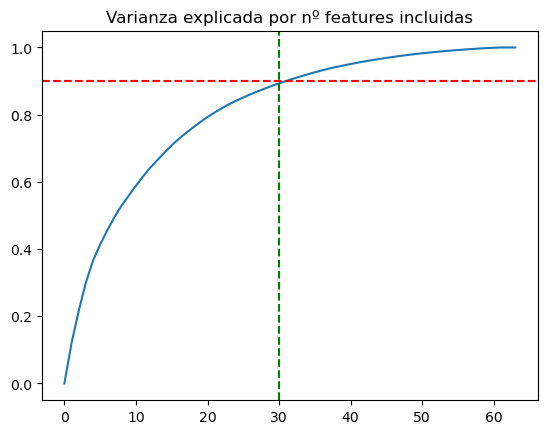

In [89]:
plt.plot(range(x.shape[1]), ve)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axvline(x=30, color='g', linestyle='--')
plt.title('Varianza explicada por nº features incluidas')


In [81]:
n = 30
pca = PCA(n_components=n)
x_pca = pca.fit_transform(x_scaled)

In [82]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.30)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30)

In [83]:
from sklearn.linear_model import LinearRegression

lreg_pca = LinearRegression()
lreg = LinearRegression()

lreg_pca.fit(X_train_pca,y_train_pca)
lreg.fit(X_train,y_train)

LinearRegression()

In [84]:
y_pred_pca = lreg_pca.predict(X_test_pca)
y_pred = lreg.predict(X_test)


In [90]:
from sklearn.metrics import accuracy_score, precision_score

